In [2]:
!pip install POT
!ls plots
####Required liberaries (uncomment to install)
! pip install seaborn
! pip install pandas

# !mkdir plots
from  scipy.optimize import newton
import math
from google.colab import files
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
from scipy import signal
import itertools
from matplotlib import animation, rc
from IPython.display import HTML
from matplotlib import pyplot as plt
from scipy.special import sici
import pandas as pd
import seaborn as sns
import ot
# font = {'size'   : 12}

# matplotlib.rc('font', **font)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 702.9/702.9 kB 9.2 MB/s eta 0:00:00
ls: cannot access 'plots': No such file or directory
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


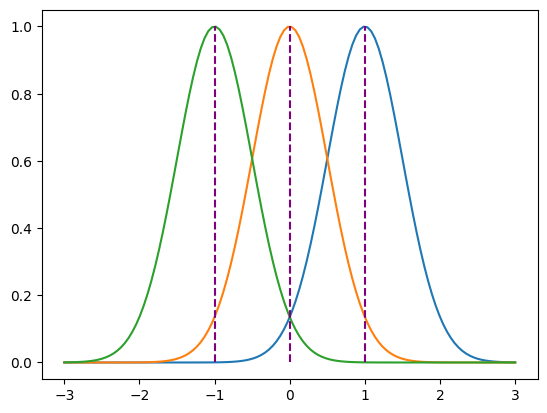

In [5]:


def gaussian(x, mu, sig): # from stackoverflow (https://stackoverflow.com/questions/14873203/plotting-of-1-dimensional-gaussian-distribution-function)
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))



0 ----------
1 0.4
0.2 0.5
-0.8 0.7


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

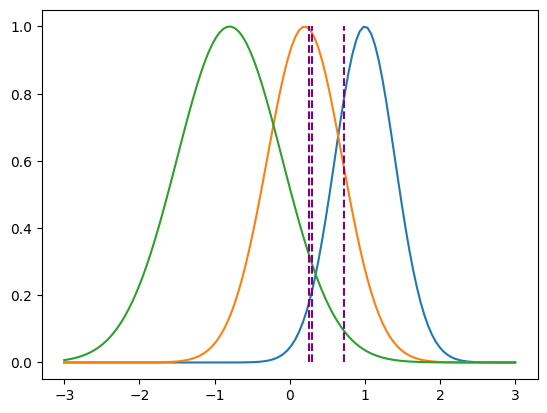

In [60]:
# clusering 
n = 3
mean_vars = [[1,0.4],[0.2,0.5],[-.8,0.7]]
samples = 100
y = []
for mu,sig in mean_vars:
  y = np.append(y,sig*np.random.randn(samples)+mu*np.ones(samples))
  # y = np.append(y,mean_vars[2][1]*np.random.randn(samples)+np.ones(samples)*mean_vars[2][0]) 

# energy distance minimization
n = 3


conv = []
theory = []
itrs = []
ids = []
for k in range(1):
  print(k,"----------")
  # y = np.random.rand(n)
  x = np.random.rand(n) 
  
  def kernel(x,y): 
     xv, yv = np.meshgrid(x, y, indexing='ij')
     return np.abs(xv-yv)
  def energy(x): 
    return  np.mean(2*kernel(x,y))-np.mean(kernel(x,x))-np.mean(kernel(y,y))
  def grad(x): 
    xv, yv = np.meshgrid(x, y, indexing='ij')
    xx, xp = np.meshgrid(x, x, indexing='ij')
    return -1*np.mean(np.sign(xx-xp),axis=1)+np.mean(np.sign(xv-yv),axis=1)
  # minenery = energy(x)
  x_values = np.linspace(-3, 3, 120)
  for mu, sig in mean_vars:
      print(mu,sig)
      plt.plot(x_values, gaussian(x_values, mu, sig))
  plt.vlines(x=x, ymin=0, ymax=1, colors='purple', ls='--',)
  plt.savefig('pretrained.pdf',format='pdf')
  files.download('pretrained.pdf')
  for i in range(50000): 
    r = (np.random.rand(n)-0.5)*0.5
    x = x - (grad(x)+r)/math.sqrt(i+1)
    if i % 500 == 0:
      # print(energy(x),np.linalg.norm(x))
      # if energy(x)<minenery: 
      minenery = energy(x)
      # print(energy(x))
      theory.append(5/math.sqrt(i+1))
      conv.append(minenery)
      itrs.append(i)
      ids.append(i)
results = []
# run_dict={'run_id': ids,'experiment':np.log(conv),'theory':np.log()}
# results.append(pd.DataFrame(run_dict))
# results=pd.concat(results)


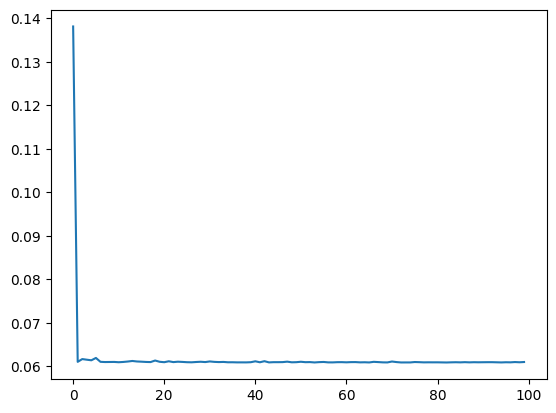

In [57]:
plt.plot(conv)

In [53]:
mean_vars[1][1]

0.5

In [58]:
x

array([ 0.24482872,  1.05230554, -0.81299525])

1 0.4
0.2 0.5
-0.8 0.7


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

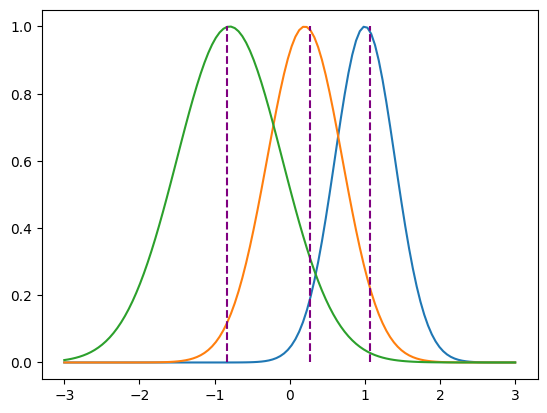

In [62]:
x_values = np.linspace(-3, 3, 120)
for mu, sig in mean_vars:
    print(mu,sig)
    plt.plot(x_values, gaussian(x_values, mu, sig))
plt.vlines(x=x, ymin=0, ymax=1, colors='purple', ls='--',)
plt.savefig('trained.pdf',format='pdf')
files.download('trained.pdf')

In [ ]:
# energy distance minimization
n = 100


conv = []
theory = []
itrs = []
ids = []
for k in range(10):
  print(k,"----------")
  y = np.random.rand(n)
  x = np.random.rand(n) 
  def kernel(x,y): 
     xv, yv = np.meshgrid(x, y, indexing='ij')
     return np.abs(xv-yv)
  def energy(x): 
    return  np.mean(2*kernel(x,y)-kernel(x,x)-kernel(y,y))
  def grad(x): 
    xv, yv = np.meshgrid(x, y, indexing='ij')
    xx, xp = np.meshgrid(x, x, indexing='ij')
    return -1*np.mean(np.sign(xx-xp),axis=1)+np.mean(np.sign(xv-yv),axis=1)
  # minenery = energy(x)
  for i in range(100000): 
    r = (np.random.rand(n)-0.5)*0.2
    x = x - (grad(x)+r)/math.sqrt(i+1)
    if i % 500 == 0:
      # print(energy(x),np.linalg.norm(x))
      # if energy(x)<minenery: 
      minenery = energy(x)
      # print(energy(x))
      theory.append(5/math.sqrt(i+1))
      conv.append(minenery)
      itrs.append(i)
      ids.append(i)
results = []
# run_dict={'run_id': ids,'experiment':np.log(conv),'theory':np.log()}
# results.append(pd.DataFrame(run_dict))
# results=pd.concat(results)


0 ----------
1 ----------
2 ----------
3 ----------
4 ----------
5 ----------
6 ----------
7 ----------
8 ----------
9 ----------


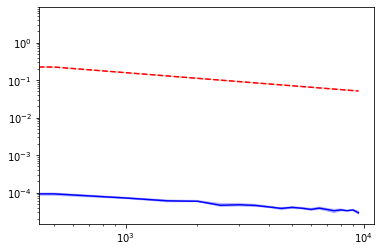

In [ ]:
from ssl import PROTOCOL_TLSv1_2
results = []
run_dict={'run_id': ids,'experiment':conv,'theory':theory}
results.append(pd.DataFrame(run_dict))
results=pd.concat(results)
p1 = sns.lineplot(data=results ,x="run_id",y="experiment",  ci=95,color='blue',label='')
p2 = sns.lineplot(data=results,x="run_id",y="theory",  linestyle='--',ci=95,color='red',label='')
# p1.set(xlabel='Layer',fontsize=15)
# plt.rcParams['text.usetex'] = True
p2.set(xscale='log')
p2.set(yscale='log')
p1.set_xlabel('', fontsize=1)
p1.set_ylabel('',fontsize=1)
fig = p2.get_figure()
fig.savefig('energy_distance_dc.pdf',format='pdf')

In [ ]:
# energy distance minimization

ns = [4,8,16,32,64,128]
experiment = []


theory = []
itrs = []
ids = []
for k in range(10):
  for n in ns:
      print(k,"----------")
      x = np.random.rand(n)/10 -0.1
      def kernel(x,y): 
        xv, yv = np.meshgrid(x, y, indexing='ij')
        return np.abs(xv-yv)
      def energy(x): 
        return  np.mean(-1*kernel(x,x))+np.mean(x**2)+1./3.0
      def grad(x): 
        xx, xp = np.meshgrid(x, x, indexing='ij')
        return -1*np.mean(np.sign(xx-xp),axis=1)/float(n)+x/(float(n))
      # minenery = energy(x)
      conv = []
      for i in range(300000): 
        r = (np.random.rand(n)-0.5)*0.1
        x = x - (grad(x)+r)/math.sqrt(i+1)
        if i % 5000 == 0:
          # print(energy(x),np.linalg.norm(x))
          # if energy(x)<minenery: 
          minenery = energy(x)
          print(energy(x))
          
          conv.append(minenery)
          itrs.append(i)
      ids.append(n)      
      experiment.append(min(conv))
      theory.append(1.0/float(n))

# run_dict={'run_id': ids,'experiment':np.log(conv),'theory':np.log()}
# results.append(pd.DataFrame(run_dict))
# results=pd.concat(results)


0 ----------
0.19529222147036066
0.020854101405281267
0.020836707617613415
0.020854981279358142
0.0208423960706991
0.020844379505886412
0.020834626829449976
0.020842459985749018
0.020841447444543137
0.020847986973854815
0.020838250639573064
0.020836638001368757
0.02083761506256626
0.02083499274247097
0.02085915455491405
0.020833905199455383
0.020848920965049922
0.020836970436075408
0.020837274013935703
0.020840200834605027
0.020837699366490103
0.02084294982837448
0.02084750422293158
0.02083900591392024
0.020836894202876877
0.020835111472033152
0.020838250251127954
0.02083763464449334
0.020838221593371398
0.020839878721916116
0.020841180672472037
0.020836977750601615
0.020834493152256717
0.020837421024931746
0.020837920566489088
0.020834249076849665
0.020835659734673218
0.0208369367374191
0.02083599039594769
0.02083600854240969
0.02083610535153052
0.0208352955176781
0.020833945905394335
0.02083640576208895
0.020833468444662884
0.02084058090696772
0.02083607937812021
0.020838327922457156

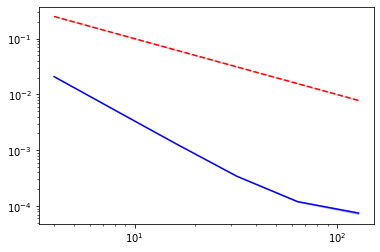

In [ ]:
from ssl import PROTOCOL_TLSv1_2
results = []
run_dict={'run_id': ids,'experiment':experiment,'theory':theory}
results.append(pd.DataFrame(run_dict))
results=pd.concat(results)
p1 = sns.lineplot(data=results ,x="run_id",y="experiment",  ci=95,color='blue',label='')
p2 = sns.lineplot(data=results,x="run_id",y="theory",  linestyle='--',ci=95,color='red',label='')
# p1.set(xlabel='Layer',fontsize=15)
# plt.rcParams['text.usetex'] = True
p2.set(xscale='log')
p2.set(yscale='log')
p1.set_xlabel('', fontsize=1)
p1.set_ylabel('',fontsize=1)
fig = p2.get_figure()
fig.savefig('approximation.pdf',format='pdf')

In [ ]:
files.download('approximation.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# # orthogonal tensor decomposition 
# d = 20 

# T = 1000 

# ss = 0.01

# conv = []
# theory = []
# itrs = []
# ids = []
# for k in range(10):
#   u, s, v = np.linalg.svd(np.random.randn(d,d))
#   X = np.random.randn(d,d)
#   def func(X): 
#     out = 0 
#     for j in range(d):
#       for i in range(d): 
#         out += (np.dot(u[i,:],X[j,:]))**3/(d*np.linalg.norm(X[j,:])**3)
#     return out
#   for j in range(d): 
#       X[j,:] = X[j,:]/np.linalg.norm(X[j,:])
#   def grad(X, ind): 
#     out = np.zeros(d)
#     for i in range(d): 
#       out += u[i,:]*(np.dot(u[i,:],X[ind,:]))**2 - ((np.dot(u[i,:],X[ind,:]))**3)*X[ind,:]
#     return out
#   for i in range(T): 
#     for j in range(d): 
#       X[j,:] = X[j,:] + ss*grad(X,j)
#       X[j,:] = X[j,:]/np.linalg.norm(X[j,:])
#     if i % 20 ==0:
#       print(-1*func(X)+1)
#       conv.append(-1*func(X)+1)
#       theory.append(d**2/(d**2+float(i+1)))
#       ids.append(i)



0.9926034326089819
0.9300247507486645
0.8677030487935784
0.806444068864065
0.7469479372099526
0.6897493658446112
0.6352145553488988
0.5835810541029727
0.5350044857774696
0.4895797137902206
0.4473302616137683
0.4081864199470152
0.37197778250292146
0.33845037114227283
0.3073010991831362
0.27821689061445276
0.25090980264772855
0.2251445435495032
0.20075703892557895
0.17766288135958308
0.15585426252082468
0.1353846698669352
0.116343077617441
0.0988233158573113
0.0828976373397925
0.06860284179361142
0.0559410679589013
0.04488884919176406
0.035404025747073575
0.027424333900085585
0.020860116942932327
0.015588947178559187
0.011458281299125406
0.008296503134657796
0.005928079833644073
0.004187641485668747
0.0029296802053137005
0.002033086991485966
0.0014014622428419887
0.0009607562236346734
0.0006556695394495105
0.00044581668122656293
0.00030221969549082406
0.00020437426651065405
0.00013793163983122358
9.293866121729e-05
6.253949788170843e-05
4.203819854442514e-05
2.823267228535542e-05
1.89473

<ipython-input-164-e396c87dbf13>:3: RuntimeWarning: divide by zero encountered in log
  run_dict={'run_id': np.log(ids),'experiment':np.log(conv),'theory':np.log(theory)}


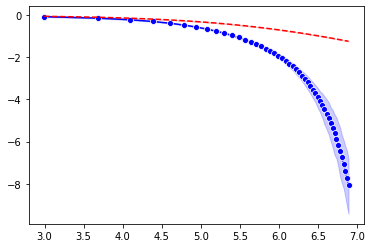

In [ ]:
# from ssl import PROTOCOL_TLSv1_2
# results = []
# run_dict={'run_id': np.log(ids),'experiment':np.log(conv),'theory':np.log(theory)}
# results.append(pd.DataFrame(run_dict))
# results=pd.concat(results)
# p1 = sns.lineplot(data=results,x="run_id",y="experiment",  marker = 'o', ci=95,color='blue',label='')
# p2 = sns.lineplot(data=results,x="run_id",y="theory",  linestyle='--',ci=95,color='red',label='')
# # p1.set(xlabel='Layer',fontsize=15)
# # plt.rcParams['text.usetex'] = True
# p1.set_xlabel('', fontsize=1)
# p1.set_ylabel('',fontsize=1)
# fig = p2.get_figure()
# fig.savefig('tensor_dc.pdf',format='pdf')

In [ ]:
files.download('tensor_dc.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>